# Task 2

## Prediction using Unsupervised ML

Predict the optimum number of clusters and represent it visually which is given in the dataset.

In [1]:
# Importing Required Libraries and Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
# Reading and loading the IRIS Dataset
iris = datasets.load_iris()
i_data = pd.DataFrame(iris.data, columns = iris.feature_names)
print(i_data.shape)
i_data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now in this case I have decided to use K_Means Clustering procedure to predict the optimum number of clusters. But first let's visualize the data so that an approximate number of classifications can be assumed.

In [3]:
# Predicting the Optimum Number of Clusters by K-Means Classification
from sklearn.cluster import KMeans
X = i_data.iloc[:, [0, 1, 2, 3]].values

In [4]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
y_kmeans = kmeans.predict(X)

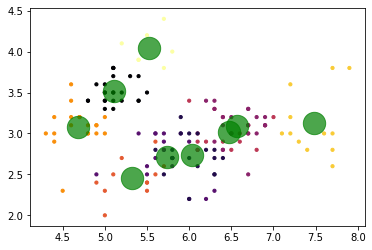

In [6]:
# Plotting the Dataset for Better Observation
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

Quite clearly and safely we can expect that optimum number of clusters should be 2 or 3. So, now we shall take the help of the Elbow Method to confirm the suitable number here.

In [7]:
# Predicting the Optimum Number of Clusters using Elbow Method
kmeans.inertia_

28.03343715907416

In [8]:
sse_ = []      #within-cluster Sums of Squared Error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

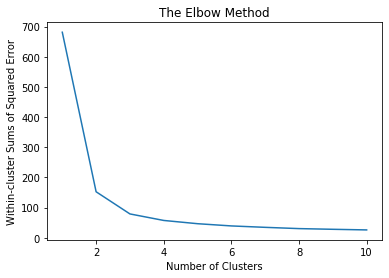

In [9]:
#Plotting the Results of this Method to Observe the "Elbow(s)" in a Line Graph
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sums of Squared Error')
plt.show()

From the above graph it is clear that 3 will be a better option over 2 as the optimum number of clusters. Let's try another method namely the Silhouette Analysis for better verification.

In [10]:
#Predicting the Optimum Number of Clusters using Silhouette Analysis
from sklearn.metrics import silhouette_score

In [11]:
sse_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

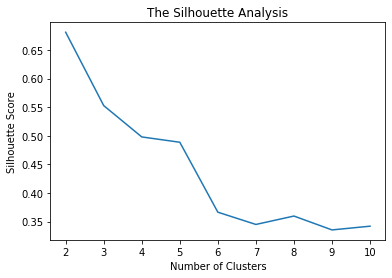

In [12]:
#Plotting the Results of this Analysis Procedure for Better Understanding
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.title('The Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Concluding from both the Analysis, I have decided to choose the optimum number of clusters as 3.

So now, I am going to represent the clusters visually along with their respective centroids.

In [13]:
#Applying K_Means Classifier to the IRIS Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

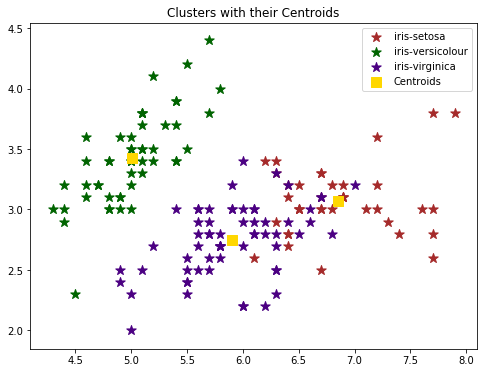

In [14]:
#Representing the Clusters for Visualization
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, marker='*', c = 'brown', label = 'iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, marker='*', c = 'darkgreen', label = 'iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, marker='*', c = 'indigo', label = 'iris-virginica')


#Plotting the Respective Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker=',', c='gold', label = 'Centroids')
plt.legend()
plt.title('Clusters with their Centroids');

Above Scatter Plot is the Visual Representation for the given Iris Dataset where we can observe that the Optimum Number of Clusters is 3 for this data.